## Práctica 3 Grafos

#### Objetivos
• Crear un grafo en Spark usando el API de GraphFrames.

• Realizar algunas operaciones sobre ese grafo y obtener resultados.

#### Los ficheros que se incluyen son:
• vertices-subset.csv: CSV con los datos de las personas del dataset. Los nombres de los campos en el fichero CSV indican el contenido de cada columna.

• edges-subset.csv: CSV con los enlaces (relación padre-hijo) entre personas del dataset. La columna src denota el padre/madre y la columna dst el hijo/hija.

###### 1. Cree un grafo de GraphFrames correspondiente a los fcheros de datos pasados.

In [1]:
# cargar los datos de ambos ficheros
vertices = spark.read.csv('./p3_spark/spark-grafos-practica/vertices-subset.csv', inferSchema=True, header=True,\
                        nullValue='\\N')
edges = spark.read.csv('./p3_spark/spark-grafos-practica/edges-subset.csv', inferSchema=True, header=True,\
                        nullValue='\\N')

In [2]:
# vemos la estructura de los vertices
vertices.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- is_alive: integer (nullable = true)
 |-- birth_year: string (nullable = true)
 |-- birth_location_city: string (nullable = true)
 |-- birth_location_country: string (nullable = true)
 |-- death_year: string (nullable = true)
 |-- death_location_country: string (nullable = true)
 |-- cause_of_death: string (nullable = true)



In [3]:
# vistazo a los datos cargados
vertices.head(10)

[Row(id=3722902, gender='female', is_alive=0, birth_year='*', birth_location_city='*', birth_location_country='*', death_year='*', death_location_country='*', cause_of_death='*'),
 Row(id=25358504, gender='female', is_alive=0, birth_year='1691', birth_location_city='Meinisberg', birth_location_country='Switzerland', death_year='*', death_location_country='*', cause_of_death='*'),
 Row(id=33698009, gender='female', is_alive=0, birth_year='1835', birth_location_city='Buxted', birth_location_country='England', death_year='*', death_location_country='*', cause_of_death='*'),
 Row(id=33721657, gender='male', is_alive=0, birth_year='1885', birth_location_city='Brighton', birth_location_country='England', death_year='*', death_location_country='*', cause_of_death='*'),
 Row(id=36367471, gender='male', is_alive=0, birth_year='1923', birth_location_city='Lawler', birth_location_country='USA', death_year='*', death_location_country='*', cause_of_death='*'),
 Row(id=40663895, gender='female', is_

In [4]:
# recuento de los datos cargados
vertices.count()

4527

In [5]:
# vemos la estructura de los edges
edges.printSchema()

root
 |-- src: integer (nullable = true)
 |-- dst: integer (nullable = true)



In [6]:
# vistazo a los datos cargados
edges.head(10)

[Row(src=1629249, dst=76970031),
 Row(src=1629249, dst=70130666),
 Row(src=1629249, dst=4776782),
 Row(src=1629249, dst=40755326),
 Row(src=1629249, dst=44906140),
 Row(src=1629249, dst=65074933),
 Row(src=19974582, dst=38423639),
 Row(src=19974582, dst=48450872),
 Row(src=19974582, dst=44180944),
 Row(src=19974582, dst=9817227)]

In [7]:
# recuento de los datos cargados
edges.count()

7308

In [8]:
# importamos graphframes
import graphframes as gf

In [9]:
# creamos el grafo a partir de los vertices y edges cargados
g = gf.GraphFrame(vertices, edges)

In [10]:
# comprobamos que el grafo creado tiene los mismos datos que los ficheros cargados
print("Edges: ", g.edges.count(), "\tVertices: ", g.vertices.count())

Edges:  7308 	Vertices:  4527


In [11]:
# objeto de componentes conectados en el grafo
sc.setCheckpointDir('./tmp/cc')
cc = g.connectedComponents()

In [12]:
# Representación gráfica del grafo
pd_edges = g.edges.toPandas()
pd_nodes = g.vertices.toPandas()

In [13]:
import networkx as nx
gnx = nx.from_pandas_dataframe(pd_edges,'src','dst')
for n in pd_nodes.itertuples(index=False):
    gnx.add_node(n.id, **n._asdict())

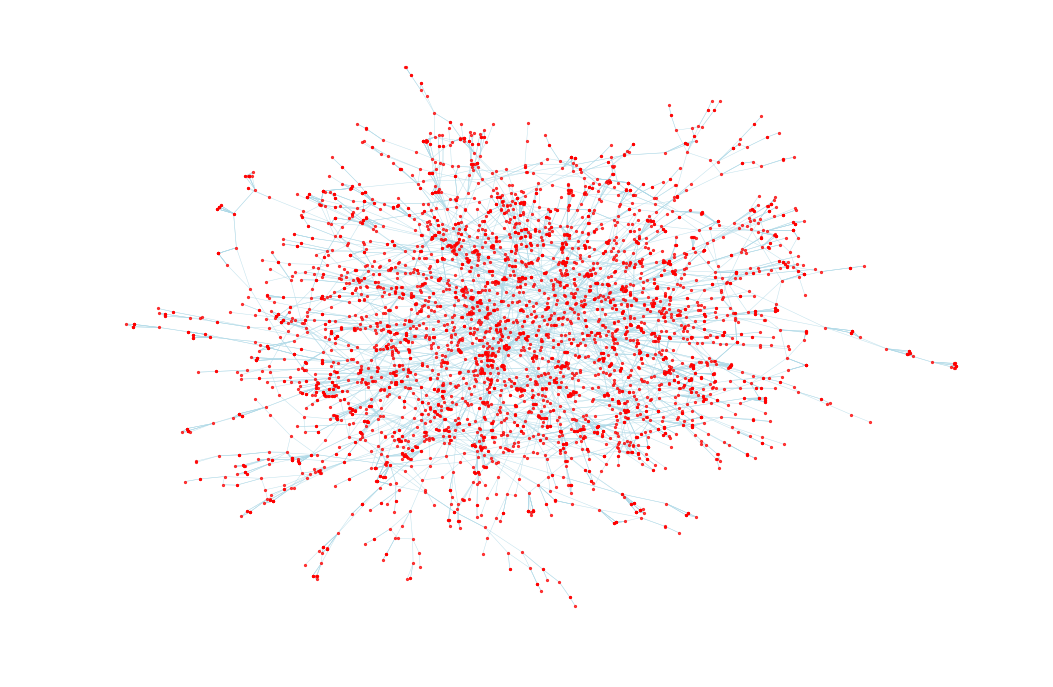

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(18, 12))
nx.draw_networkx(gnx, ax=ax, with_labels=False,
                 node_size=5, width=.5, alpha=0.75, edge_color='#add8e6')
ax.set_axis_off()

##### 2. Contenga las operaciones necesarias para contestar a las siguientes preguntas sobre el grafo creado:

##### 2.1 
¿Cuántos árboles genealógicos distintos contiene el dataset proporcionado, y qué tamaño (número de personas) tienen? (definimos un árbol genealógico como el subgrafo que contiene todos sus nodos conectados y no tiene ninguna conexión a otros nodos).

In [15]:
# utilizamos el objeto de componentes conectados
cc_ord = cc.sort('component')
cc_ord.toPandas()

,id,gender,is_alive,birth_year,birth_location_city,birth_location_country,death_year,death_location_country,cause_of_death,component
0,3722902,female,0,*,*,*,*,*,*,24553
1,36367471,male,0,1923,Lawler,USA,*,*,*,24553
2,55401056,male,1,*,Detroit,USA,*,*,*,24553
3,70886333,female,0,1957,Minneapolis,USA,*,*,*,24553
4,84696343,female,0,*,Mountain View,USA,*,*,*,24553
5,45904413,female,1,*,Aurora,USA,*,*,*,24553
6,64782268,male,0,*,Aurora,USA,*,*,*,24553
7,74576205,male,1,*,Jordan,USA,*,*,*,24553
8,81726292,female,0,1908,Shakopee,USA,1923,USA,*,24553
9,12517346,male,1,*,Aurora,USA,*,*,*,24553


In [16]:
# agrupamos por componente y calculamos el recuento de registros de cada uno
cc_ord.groupBy('component').count().orderBy('count', ascending=False).toPandas()

,component,count
0,55143,1658
1,24553,1488
2,225398,1381


###### Comentarios
Se obtienen 3 componentes dentro del grafo, con 1658 personas, 1488 y 1381 respectivamente en cada árbol genealógico.

##### 2.2 
¿Cuántos ejemplos hay en el dataset de 3 personas de generaciones sucesivas (padre o madre, hijo o hija, nieto o nieta) en las que cada una tiene un país de nacimiento distinto (es decir, 3 países de nacimiento distintos)? Nota: no cuente para este cálculo las personas con país de nacimiento desconocido.

In [17]:
# Partiendo del grafo, filtramos los vértices donde el atributo del pais de nacimiento sea igual a *
gvertices = g.vertices.filter('birth_location_country != "*"')

In [18]:
# generamos un segundo grafo pasándole los vértices que se obtuvieron antes y tengan el pais de nacimiento con un
# valor correcto
g2 = gf.GraphFrame(gvertices, g.edges)

In [19]:
# sobre el grafo generado anteriormente buscamos los caminos a-->b-->c
ruta_3_gen = g2.find("(a)-[e1]->(b); (b)-[e2]->(c)")
ruta_3_gen.count()

5770

In [20]:
# filtramos los caminos obtenidos para quedarnos con aquellos donde el pais de nacimiento es diferente para el nodo a,
# el nodo b, y el nodo c.
ruta_3_gen.filter('a.birth_location_country!=b.birth_location_country \
                    AND b.birth_location_country!=c.birth_location_country \
                    AND c.birth_location_country!=a.birth_location_country').toPandas()

,a,e1,b,e2,c
0,"(52738938, female, 0, 1868, Toronto, Canada, 1...","(52738938, 58672341)","(58672341, female, 0, 1895, Dover, England, 19...","(58672341, 55439055)","(55439055, male, 0, 1923, *, Argentina, 2000, ..."
1,"(52738938, female, 0, 1868, Toronto, Canada, 1...","(52738938, 57297421)","(57297421, male, 0, 1886, Plymouth, England, 1...","(57297421, 72093694)","(72093694, female, 1, *, Tendring District, En..."
2,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 29400558)","(29400558, male, 0, 1859, Aurora, USA, 1937, U..."
3,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 26826732)","(26826732, male, 0, 1863, Marystown, USA, 1949..."
4,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 70231284)","(70231284, female, 0, 1879, Marystown, USA, 19..."
5,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 17088288)","(17088288, female, 0, 1857, Aurora, USA, 1953,..."
6,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 17179580)","(17179580, female, 0, 1871, Shakopee, USA, 194..."
7,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 21913806)","(21913806, male, 0, 1868, Spring Lake, USA, 19..."
8,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 50059424)","(50059424, male, 0, 1860, Aurora, USA, 1938, U..."
9,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 40924174)","(40924174, female, 0, 1862, Marystown, USA, 19..."


Se obtienen 42 ejemplos de generaciones padre-hijo-nieto donde cada persona tiene un país de nacimiento diferente.

In [21]:
# Otra forma de realizarlo, calculando directamente las rutas sobre el grafo inicial, sin filtrar primero por los
# vértices donde el pais de nacimiento no es válido.
# obtenemos las rutas de persona a relacionada con persona b y persona b relacionada con persona c.
ruta_3 = g.find("(a)-[e1]->(b); (b)-[e2]->(c)")

In [22]:
ruta_3.count()

7931

In [23]:
# eliminar de las rutas obtenidas todos los registros con pais de nacimiento == *
ruta_3_pais = ruta_3.filter('a.birth_location_country!="*" AND b.birth_location_country!="*"\
                    AND c.birth_location_country!="*"')
ruta_3_pais.count()

5770

In [24]:
# entonces filtrar los que tengan paises de nacimiento distintos para la persona a, b y c
ruta_pais_dist = ruta_3_pais.filter('a.birth_location_country!=b.birth_location_country \
                    AND b.birth_location_country!=c.birth_location_country \
                    AND c.birth_location_country!=a.birth_location_country')
ruta_pais_dist.count()

42

In [25]:
ruta_pais_dist.toPandas()

,a,e1,b,e2,c
0,"(52738938, female, 0, 1868, Toronto, Canada, 1...","(52738938, 58672341)","(58672341, female, 0, 1895, Dover, England, 19...","(58672341, 55439055)","(55439055, male, 0, 1923, *, Argentina, 2000, ..."
1,"(52738938, female, 0, 1868, Toronto, Canada, 1...","(52738938, 57297421)","(57297421, male, 0, 1886, Plymouth, England, 1...","(57297421, 72093694)","(72093694, female, 1, *, Tendring District, En..."
2,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 29400558)","(29400558, male, 0, 1859, Aurora, USA, 1937, U..."
3,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 26826732)","(26826732, male, 0, 1863, Marystown, USA, 1949..."
4,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 70231284)","(70231284, female, 0, 1879, Marystown, USA, 19..."
5,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 17088288)","(17088288, female, 0, 1857, Aurora, USA, 1953,..."
6,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 17179580)","(17179580, female, 0, 1871, Shakopee, USA, 194..."
7,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 21913806)","(21913806, male, 0, 1868, Spring Lake, USA, 19..."
8,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 50059424)","(50059424, male, 0, 1860, Aurora, USA, 1938, U..."
9,"(3225518, female, 0, 1792, Bollendorf, Germany...","(3225518, 60577734)","(60577734, male, 0, 1832, Waldbillig, Luxembou...","(60577734, 40924174)","(40924174, female, 0, 1862, Marystown, USA, 19..."


##### Comentarios
Se han obtenido en el grafo 42 ejemplos de generaciones sucesivas (padre,hijo,nieto) donde cada persona involucrada tiene un pais de nacimiento diferente.

##### 2.3 
Encuentre la persona del dataset que más descendencia directa ha tenido (i.e. mayor número de hijos+hijas). ¿En qué año nació? ¿Qué nacionalidad tiene?. ¿Cuántos hijos+hijas tuvo?.

In [26]:
# utilizando g.outDegrees podemos ver el grado máximo de salida que sería la/s persona/s con mayor número de hijos/as
maxDescend = g.outDegrees.groupBy().max("outDegree").toPandas()
maxDescend

,max(outDegree)
0,16


In [27]:
# mostramos los ids que tendrían grado de salida igual a 16.
maxs = g.outDegrees.filter("outDegree == 16").toPandas()
maxs

,id,outDegree
0,43475617,16
1,43871304,16


In [28]:
# obtenemos de los vértices o nodos la información de los IDs obtenidos anteriormente que son los dos nodos con mayor
# número de descendientes
pd_nodes.loc[pd_nodes['id'].isin([43475617, 43871304])]

,id,gender,is_alive,birth_year,birth_location_city,birth_location_country,death_year,death_location_country,cause_of_death
879,43475617,female,0,1704,Isfield,England,1780,England,*
4449,43871304,male,0,1700,Isfield,England,1767,England,*


Las dos personas que mayor descendencia directa tuvieron, 16 hijos/as, serían un hombre y una mujer que nacieron en 1700 y 1704 respectivamente, y ambos son de nacionalidad inglesa.

In [29]:
# Otra forma de hacerlo, añadiendo al df de vértices/personas un atributo con los grados de salida de cada id
df_with_outdegrees = g.outDegrees.join(vertices, 'id').toPandas()
df_with_outdegrees

,id,outDegree,gender,is_alive,birth_year,birth_location_city,birth_location_country,death_year,death_location_country,cause_of_death
0,75043698,1,female,0,1875,Aurora,USA,1959,USA,*
1,63283926,3,female,0,1729,*,*,*,*,*
2,32990769,2,female,0,1916,Chicago,USA,2009,*,*
3,50758787,2,male,0,1909,Wales,USA,*,*,*
4,27860748,13,female,0,1832,Colwick,England,1894,England,*
5,79129334,11,female,0,1784,*,England,1828,England,*
6,71636967,2,female,0,1901,Aurora,USA,1939,USA,*
7,70763555,2,male,1,*,Detroit,USA,*,*,*
8,37184454,3,male,0,1875,Tunbridge Wells,England,*,*,*
9,63106255,5,female,0,1659,Meinisberg,Switzerland,1722,*,*


In [30]:
# ordenamos de forma descendente por el atributo outDegree mostrando sólo los 5 primeros, donde pueden verse de nuevo
# las dos personas con mayor número de descendientes.
df_with_outdegrees.sort_values('outDegree',ascending=False).head(2)

,id,outDegree,gender,is_alive,birth_year,birth_location_city,birth_location_country,death_year,death_location_country,cause_of_death
301,43475617,16,female,0,1704,Isfield,England,1780,England,*
1452,43871304,16,male,0,1700,Isfield,England,1767,England,*


##### Comentarios 
Se han vuelto a obtener las dos mismas personas que mayor descendencia directa tuvieron, 16 hijos/as, serían un hombre y una mujer que nacieron en 1700 y 1704 respectivamente, y ambos son de nacionalidad inglesa.